In [58]:
import pandas as pd
from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

df = pd.read_csv("final.csv")

cols_to_keep = ['jacket_number', 'age_at_arrest', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'r', 'days_since', 'offense_level', 'previous_i', 'age_first', 'year']
categorical =  ['marital_status', 'employment_status', 'race', 'city', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type', 'offense_level', 'year']

predict_columns = ['age_at_arrest', 'age_at_release', 'hours', 'marital_status', 'employment_status',
    'city', 'race', 'sex', 'STATE', 'citizenship', 'occupation', 'school', 'prisoner_type']

new_df = df.loc[:, cols_to_keep]
new_df


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,occupation,school,prisoner_type,r,days_since,offense_level,previous_i,age_first,year
0,6265,72.0,14,Single,Retired,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,UNEMPLOYED,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,72.0,2013
1,6565,68.0,40,Single,Self Employed,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,Misdemeanor Arraignment,True,NaN,Misdemeanor,0,68.0,2012
2,6565,69.0,11,Single,Retired,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,521.0,Other,1,68.0,2013
3,6565,70.0,16,Single,Unemployed,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,316.0,Other,2,68.0,2014
4,6565,71.0,3,Single,Employed - Full Time,SAVOY,Black,Male,ILLINOIS,UNITED STATES,SELF EMPLOYED,High School,OV Pre-Trial,True,209.0,Other,3,68.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40252,1069761,54.0,0,Divorced,Unemployed,DANVILLE,Black,Male,ILLINOIS,UNITED STATES,SALES,High School,Felony Other,False,NaN,Felony,0,54.0,2018
40253,1069763,18.0,0,Single,Unemployed,RANTOUL,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Other,False,NaN,Misdemeanor,0,18.0,2018
40254,1069766,32.0,115,Married,Employed - Full Time,RANTOUL,Black,Female,ILLINOIS,UNITED STATES,FACTORY WORKER,High School,Misdemeanor Arraignment,False,NaN,Misdemeanor,0,32.0,2018
40255,1069768,31.0,9,Married,Employed - Full Time,CHICAGO,Black,Male,ILLINOIS,BRAZIL,STUDENT,High School,Misdemeanor Pre-Trial,False,NaN,Misdemeanor,0,31.0,2018


In [59]:
s = setup(new_df, target='r', categorical_features=categorical)

,Description,Value
0,Session id,1508
1,Target,r
2,Target type,Binary
3,Original data shape,"(40257, 19)"
4,Transformed data shape,"(40257, 44)"
5,Transformed train set shape,"(28179, 44)"
6,Transformed test set shape,"(12078, 44)"
7,Numeric features,6
8,Categorical features,12
9,Rows with missing values,48.7%


In [60]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7176,0.0000,0.7339,0.7207,0.7272,0.4345,0.4347,0.5890
gbc,Gradient Boosting Classifier,0.7161,0.0000,0.7432,0.7148,0.7287,0.4313,0.4317,0.3830
rf,Random Forest Classifier,0.7051,0.0000,0.7196,0.7096,0.7145,0.4095,0.4096,0.2860
ada,Ada Boost Classifier,0.7025,0.0000,0.7337,0.7006,0.7167,0.4039,0.4044,0.1260
ridge,Ridge Classifier,0.6935,0.0000,0.7472,0.6844,0.7144,0.3851,0.3869,0.0440
lda,Linear Discriminant Analysis,0.6935,0.0000,0.7474,0.6842,0.7144,0.3850,0.3868,0.0520
et,Extra Trees Classifier,0.6830,0.0000,0.7001,0.6877,0.6938,0.3653,0.3654,0.2720
lr,Logistic Regression,0.6805,0.0000,0.7341,0.6728,0.7021,0.3590,0.3607,0.2300
dt,Decision Tree Classifier,0.6285,0.0000,0.6401,0.6373,0.6387,0.2564,0.2565,0.0590
knn,K Neighbors Classifier,0.5930,0.0000,0.6224,0.5994,0.6107,0.1845,0.1847,0.0770


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1508, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [61]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7140,0.0000,0.7344,0.7156,0.7249,0.4272,0.4273
1,0.7250,0.0000,0.7593,0.7200,0.7391,0.4488,0.4495
2,0.7278,0.0000,0.7490,0.7283,0.7385,0.4548,0.4550
3,0.7197,0.0000,0.7455,0.7187,0.7318,0.4384,0.4387
4,0.7016,0.0000,0.7448,0.6953,0.7192,0.4016,0.4026
5,0.7005,0.0000,0.7156,0.7048,0.7102,0.4004,0.4004
6,0.7250,0.0000,0.7467,0.7251,0.7358,0.4492,0.4494
7,0.7282,0.0000,0.7599,0.7238,0.7414,0.4553,0.4559
8,0.7133,0.0000,0.7370,0.7133,0.7250,0.4257,0.4259


In [62]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.0000,0.7337,0.7164,0.7250,0.4279,0.4280
1,0.7243,0.0000,0.7517,0.7223,0.7367,0.4476,0.4480
2,0.7324,0.0000,0.7517,0.7335,0.7425,0.4641,0.4643
3,0.7207,0.0000,0.7420,0.7216,0.7317,0.4406,0.4408
4,0.7058,0.0000,0.7510,0.6984,0.7238,0.4100,0.4113
5,0.6991,0.0000,0.7052,0.7071,0.7062,0.3978,0.3978
6,0.7207,0.0000,0.7412,0.7217,0.7313,0.4407,0.4409
7,0.7300,0.0000,0.7599,0.7262,0.7426,0.4589,0.4594
8,0.7087,0.0000,0.7287,0.7105,0.7195,0.4165,0.4167


Fitting 10 folds for each of 10 candidates, totalling 100 fits


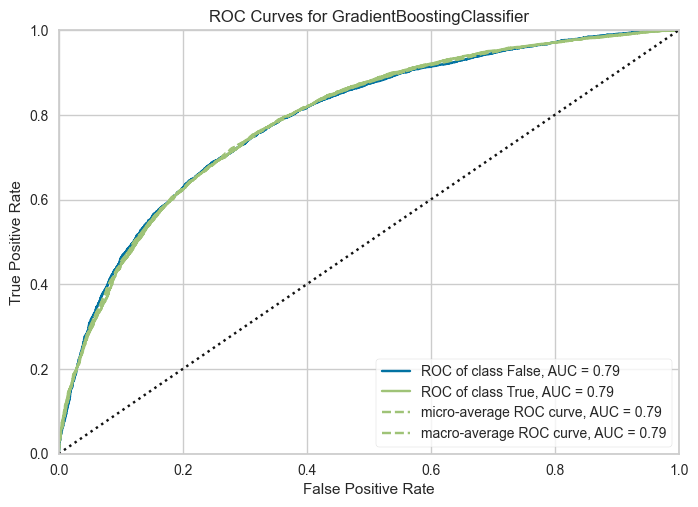

In [63]:
plot_model(tuned_gbc, plot = 'auc')

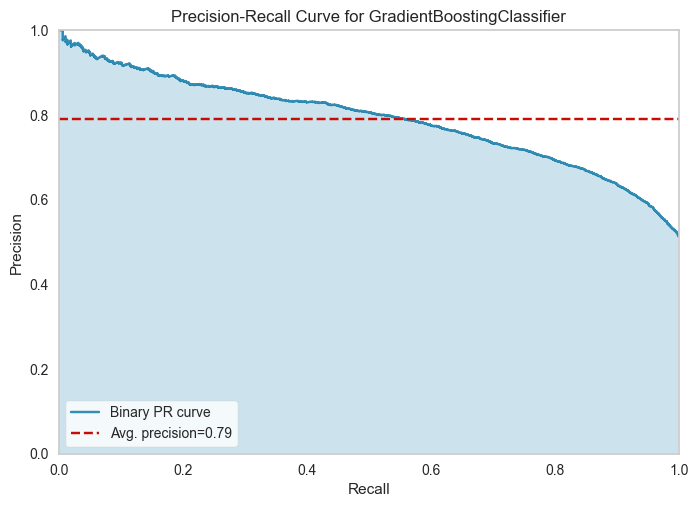

In [64]:
plot_model(tuned_gbc, plot = 'pr')

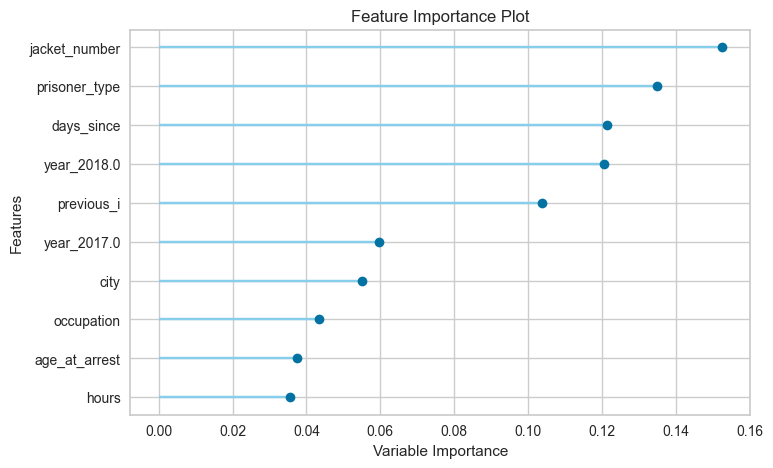

In [65]:
plot_model(tuned_gbc, plot='feature')

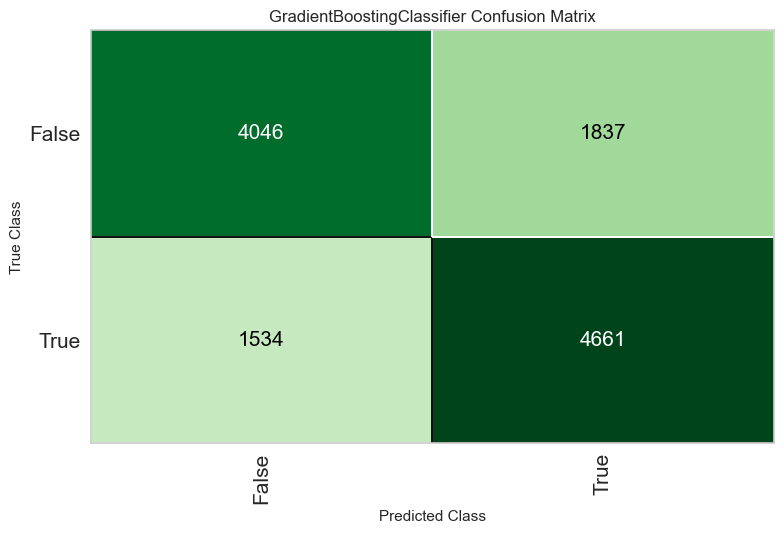

In [66]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [67]:
final_gbc = finalize_model(tuned_gbc)
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['jacket_number', 'age_at_arrest',
                                             'hours', 'days_since',
                                             'previous_i', 'age_first'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Trans...
                                            criterion='friedman_mse', init=None,
                  

In [68]:
predict_model(final_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7265,0.8014,0.7722,0.7166,0.7434,0.4516,0.4530


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
35158,1058773,45.0,1,Divorced,Employed - Full Time,DANVILLE,Black,Male,ILLINOIS,UNITED STATES,...,High School,Hold Other,NaN,Other,0,45.0,2015,False,0,0.8538
19706,1002497,20.0,0,Single,Employed - Full Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Civil Pre-Trial,NaN,Other,0,20.0,2012,True,1,0.7926
35771,1060088,19.0,14,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,NaN,Felony,0,19.0,2015,True,1,0.5186
22979,1020146,22.0,14,Married,Employed - Part Time,URBANA,Black,Female,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,NaN,Misdemeanor,0,22.0,2014,False,0,0.5062
25086,1027431,30.0,147,Married,Unemployed,SEYMOUR,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,116.0,Felony,1,29.0,2012,True,1,0.6387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,24914,48.0,249,Single,Employed - Full Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Sentence,NaN,Felony,0,48.0,2014,False,1,0.5499
7838,63105,31.0,1,Single,Employed - Part Time,LONGVIEW,Black,Male,ILLINOIS,UNITED STATES,...,High School,Traffic Arraignment,NaN,Misdemeanor,0,31.0,2012,False,1,0.7153
18429,994268,33.0,671,Single,Employed - Full Time,CHICAGO,Black,Male,ILLINOIS,UNITED STATES,...,High School,EHD,77.0,Felony,1,33.0,2016,False,0,0.8272
26681,1032105,23.0,1,Single,Employed - Full Time,MAHOMET,Black,Male,ILLINOIS,UNITED STATES,...,High School,OV Pre-Trial,632.0,Other,4,18.0,2016,False,1,0.6963


In [72]:
save_model(gbc, model_name='gbc-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['jacket_number', 'age_at_arrest',
                                              'hours', 'days_since',
                                              'previous_i', 'age_first'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Trans...
                                             criterion='friedman_mse', init=None,
   

In [73]:
unseen_predictions = predict_model(final_gbc)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7265,0.8014,0.7722,0.7166,0.7434,0.4516,0.4530


,jacket_number,age_at_arrest,hours,marital_status,employment_status,city,race,sex,STATE,citizenship,...,school,prisoner_type,days_since,offense_level,previous_i,age_first,year,r,prediction_label,prediction_score
35158,1058773,45.0,1,Divorced,Employed - Full Time,DANVILLE,Black,Male,ILLINOIS,UNITED STATES,...,High School,Hold Other,NaN,Other,0,45.0,2015,False,0,0.8538
19706,1002497,20.0,0,Single,Employed - Full Time,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Civil Pre-Trial,NaN,Other,0,20.0,2012,True,1,0.7926
35771,1060088,19.0,14,Single,Unemployed,CHAMPAIGN,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,NaN,Felony,0,19.0,2015,True,1,0.5186
22979,1020146,22.0,14,Married,Employed - Part Time,URBANA,Black,Female,ILLINOIS,UNITED STATES,...,High School,Misdemeanor Arraignment,NaN,Misdemeanor,0,22.0,2014,False,0,0.5062
25086,1027431,30.0,147,Married,Unemployed,SEYMOUR,Black,Male,ILLINOIS,UNITED STATES,...,High School,Felony Pre-Trial,116.0,Felony,1,29.0,2012,True,1,0.6387


In [74]:
unseen_predictions['prediction'] = unseen_predictions['prediction_label'].map({0: False, 1: True})

# Compare similarity between 'r' and 'prediction_mapped'
similarity = (unseen_predictions['r'] == unseen_predictions['prediction']).mean()

print("Similarity between 'r' and 'prediction_mapped':", similarity)

Similarity between 'r' and 'prediction_mapped': 0.7265275707898659
